In [58]:
#import the nessecary libraries and modules
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [59]:
#from google.colab import files
#uploaded=files.upload()

In [60]:
data = pd.read_csv("C:/Users/Begad/Documents/projects/data mining/train.csv")

In [61]:
df = pd.DataFrame(data)

In [62]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


**preprocessing steps**
###### read the data and understand it
###### outliers and nulls
###### duplicates
###### if label encoding required -> do it
###### if there is any invalid data type need to be converted -> do it like DATE
###### correlation matrix to keep the important features and discard the rest
###### if feature eng required -> do it
###### splitting into training and testing

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [64]:
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [65]:
df.duplicated().sum()

2323

In [66]:
df.drop_duplicates(inplace=True) #since the data is 878 thuosand rows so removing the duplicates
#will not affect on the acc of the model

In [67]:
df.duplicated().sum()

0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875726 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       875726 non-null  object 
 1   Category    875726 non-null  object 
 2   Descript    875726 non-null  object 
 3   DayOfWeek   875726 non-null  object 
 4   PdDistrict  875726 non-null  object 
 5   Resolution  875726 non-null  object 
 6   Address     875726 non-null  object 
 7   X           875726 non-null  float64
 8   Y           875726 non-null  float64
dtypes: float64(2), object(7)
memory usage: 66.8+ MB


**feature engineering phase1**

In [69]:
#now all info in data except the longtit and latit is  a raw data
#so it is better to make feature engineering to make meaningful data from it
# 1- firstly Data and time to be able to identify patterns in the data like timestapms
# like if there is a specific time in which crime rate increases or a specific day like weekends
#specific seasons , days of the year , or even hours like at night the rate increase beacuse people are sleeping or somthing
df['Dates'] = pd.to_datetime(df['Dates'])
df['year']= df['Dates'].dt.year
df['month']= df['Dates'].dt.month
df['hour']= df['Dates'].dt.hour


In [70]:
#drop the redundant data and irrelevant -> we don't need the date as raw data
df.drop('Dates' , axis=1 , inplace = True)

In [71]:
#making label encoding but to know it is prefered to do it manually or not we make .unique()
print(f"number of unique days : {df['DayOfWeek'].nunique()}")
print(f"number of unique locations : {df['Address'].nunique()}")
print(f"number of unique categories : {df['Category'].nunique()}")
print(f"number of unique Descripts : {df['Descript'].nunique()}")
print(f"number of unique pdDistricts : {df['PdDistrict'].nunique()}")
print(f"number of unique resoution : {df['Resolution'].nunique()}")

number of unique days : 7
number of unique locations : 23228
number of unique categories : 39
number of unique Descripts : 879
number of unique pdDistricts : 10
number of unique resoution : 17


**Feature eng pahse2**

In [72]:
#since the number of uniques in adress and categories are too large to encode it manually
#we will encode it using scikit learn
#1- manually encode days of the week
days_of_week = {
    'Sunday' : 0,
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6
}

df['DayOfWeek'] = df['DayOfWeek'].map(days_of_week)

In [73]:
df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,hour
0,WARRANTS,WARRANT ARREST,3,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23


In [74]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
# if the encoding numbers presents a sevirity better to use label encoding
#but here we don't need it we may need it in category and resolution
df = pd.get_dummies(df , columns=['PdDistrict'] , prefix='PdDistrict')

#label encoder for ordinal ones
encoder = LabelEncoder()
df['encoded_category'] = encoder.fit_transform(df['Category'])
df['encoded_resolution'] = encoder.fit_transform(df['Resolution'])


In [75]:
#drop the irrelevant cols
df.drop(['Category' , 'Resolution' , 'Address'] , axis=1 , inplace=True)

In [76]:
print (f'the total number of cols and rows after encoding and dropping the irrelevant features :{df.shape}')

the total number of cols and rows after encoding and dropping the irrelevant features :(875726, 19)


In [77]:
#since the col category covers the same meaning of the discript and also less detailed
# so we can drop discript col
df.drop('Descript' , axis=1 , inplace=True)
df.head()



,DayOfWeek,X,Y,year,month,hour,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,encoded_category,encoded_resolution
0,3,-122.425892,37.774599,2015,5,23,False,False,False,False,True,False,False,False,False,False,37,0
1,3,-122.425892,37.774599,2015,5,23,False,False,False,False,True,False,False,False,False,False,21,0
2,3,-122.424363,37.800414,2015,5,23,False,False,False,False,True,False,False,False,False,False,21,0
3,3,-122.426995,37.800873,2015,5,23,False,False,False,False,True,False,False,False,False,False,16,11
4,3,-122.438738,37.771541,2015,5,23,False,False,False,False,False,True,False,False,False,False,16,11


In [78]:
#seeing the outliers
# the outliers must be in the numerical cols , since the original data has no numerical col
# so we don't need the ouliers test here

**Exploratory data analysis (EDA)**
###### find if there is a correlation for Datetime and the crime rate by grouping the number of crimes
###### with a specific hour -? time
###### specific days -> data
###### specific -> year
###### specific location -> crime zones

**Geospatial Features**

In [79]:
from sklearn.cluster import KMeans
#cluster crimes into zones using the co ordinates thats why we dropped the Address col
coords = df[['X' , 'Y']].values
kmeannnns = KMeans(n_clusters=10 , random_state=42 ).fit(coords)
df['crime_zone'] = kmeannnns.labels_
df.head()


,DayOfWeek,X,Y,year,month,hour,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,encoded_category,encoded_resolution,crime_zone
0,3,-122.425892,37.774599,2015,5,23,False,False,False,False,True,False,False,False,False,False,37,0,4
1,3,-122.425892,37.774599,2015,5,23,False,False,False,False,True,False,False,False,False,False,21,0,4
2,3,-122.424363,37.800414,2015,5,23,False,False,False,False,True,False,False,False,False,False,21,0,4
3,3,-122.426995,37.800873,2015,5,23,False,False,False,False,True,False,False,False,False,False,16,11,4
4,3,-122.438738,37.771541,2015,5,23,False,False,False,False,False,True,False,False,False,False,16,11,2


<Axes: xlabel='crime_zone'>

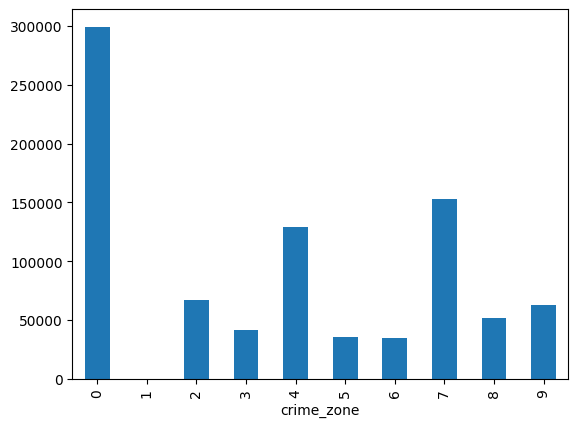

In [80]:
crime_rate_based_on_location = df.groupby('crime_zone').size()
crime_rate_based_on_location.plot(kind='bar')

after plotting we discoverd that the crime zone0 has the heighst crime rate

**Datetime features (for discovering time series analysis)**

In [81]:
import matplotlib.pyplot as plt

C:\Users\Begad\AppData\Local\Temp\ipykernel_28900\1643516895.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_crimes.index, y=yearly_crimes.values, ax=axes[0, 0], palette="Blues")
C:\Users\Begad\AppData\Local\Temp\ipykernel_28900\1643516895.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_crimes.index, y=monthly_crimes.values, ax=axes[0, 1], palette="Greens")
C:\Users\Begad\AppData\Local\Temp\ipykernel_28900\1643516895.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_crimes.index, y=daily_crimes.values, 

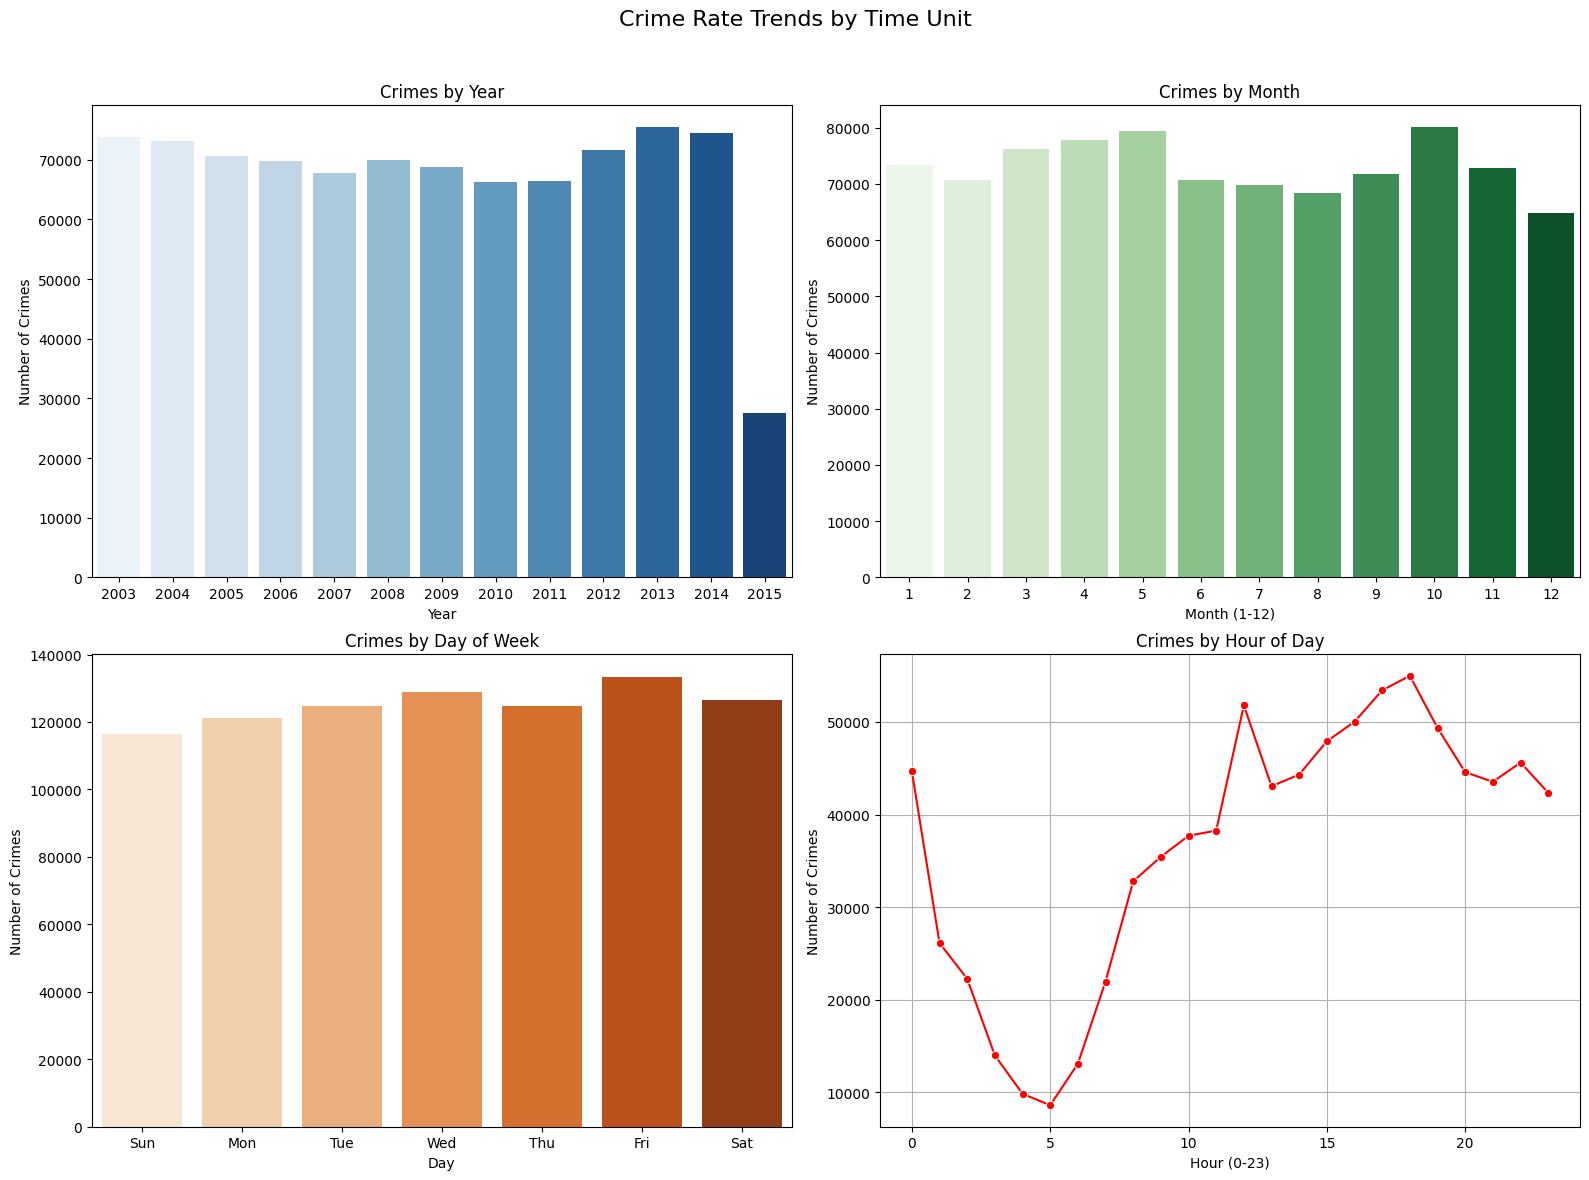

In [82]:
# Create subplots grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns
fig.suptitle("Crime Rate Trends by Time Unit", fontsize=16)

#plot one -> crime by year
yearly_crimes = df['year'].value_counts().sort_index()
sns.barplot(x=yearly_crimes.index, y=yearly_crimes.values, ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("Crimes by Year")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Number of Crimes")

#plot one -> crime by month
monthly_crimes = df['month'].value_counts().sort_index()
sns.barplot(x=monthly_crimes.index, y=monthly_crimes.values, ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title("Crimes by Month")
axes[0, 1].set_xlabel("Month (1-12)")
axes[0, 1].set_ylabel("Number of Crimes")

#plot one -> crime by Days
day_order = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
daily_crimes = df['DayOfWeek'].value_counts().sort_index()
daily_crimes.index = day_order  # Map numbers to day names
sns.barplot(x=daily_crimes.index, y=daily_crimes.values, ax=axes[1, 0], palette="Oranges")
axes[1, 0].set_title("Crimes by Day of Week")
axes[1, 0].set_xlabel("Day")
axes[1, 0].set_ylabel("Number of Crimes")

#plot one -> crime by hour
hourly_crimes = df['hour'].value_counts().sort_index()
sns.lineplot(x=hourly_crimes.index, y=hourly_crimes.values, ax=axes[1, 1], color='red', marker='o')
axes[1, 1].set_title("Crimes by Hour of Day")
axes[1, 1].set_xlabel("Hour (0-23)")
axes[1, 1].set_ylabel("Number of Crimes")
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Prevent title overlap
plt.show()

we discover that the crime rate increases most in friday pre_weekend day as the activities increases

In [83]:
df.columns

Index(['DayOfWeek', 'X', 'Y', 'year', 'month', 'hour', 'PdDistrict_BAYVIEW',
       'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION',
       'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND',
       'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN',
       'encoded_category', 'encoded_resolution', 'crime_zone'],
      dtype='object')

**Normalization**

In [84]:
from sklearn.preprocessing import StandardScaler
#we will select only the data with widly diff range
X = ['X' ,'Y' , 'year' ,'month' , 'hour' , 'encoded_category' ,  'encoded_resolution' , 'crime_zone']
scaler = StandardScaler()
df[X] = scaler.fit_transform(df[X])


In [85]:
!pip install --upgrade scikit-learn-extra


In [86]:
!pip install numpy==1.23.5


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
# Find the best K
# Let range of K be between 2 and 21
cost = []
silhouette_scores = []
k_range = range(2, 21)
#take a sample of the data to decrease runtime
sample_df = df.sample(n=10000, random_state=42)
X = sample_df.values
# Loop over each K value and record the cost and score of each one
for k in k_range:
    kmedoids= KMedoids(n_clusters=k , random_state=42).fit(X)
    cost.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X, kmedoids.labels_))

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Plot elbow method
plt.plot(k_range, cost, marker='o')
plt.title('Elbow Method (cost)')
plt.xlabel('K')
plt.ylabel('Cost')
plt.xticks(k_range)
plt.grid()
plt.show()

# Plot Silhouette
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(k_range)
plt.grid()
plt.show()



In [ ]:
# Choose the best K based on the elbow methd
best_k = 11
X_geo = sample_df[['X', 'Y']].values  # Use only spatial features to be able to plot data
print(f"Best K value based on cost: {best_k}")
#do the clustering based on the best k
kmedoids = KMedoids(n_clusters=best_k , random_state=42).fit(X_geo)
centers = kmedoids.cluster_centers_
labels = kmedoids.labels_
print('Labels:',labels)
print('Centers:',centers)


Best K value based on cost: 11


c:\Users\Begad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
c:\Users\Begad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).
  warnings.warn(


Labels: [0 5 8 ... 8 6 2]
Centers: [[ 0.48720829  0.0253727 ]
 [ 0.63294571  0.00959215]
 [-0.36070179 -0.00405595]
 [ 0.26551023 -0.07027687]
 [ 0.22191264  0.02728703]
 [ 0.0558708  -0.00429491]
 [-2.28061223 -0.02801174]
 [ 0.34808268  0.02312871]
 [ 1.06456581 -0.04862801]
 [-0.83738685 -0.01287611]
 [-1.46138325 -0.02969951]]


In [ ]:
#print the points for each cluster
for j in range(best_k):
  for i in range(len(X_geo)):
    if(kmedoids.labels_[i]==j):
     x=X_geo[i]
     print('Cluster:',j,':',x)

Cluster: 0 : [0.49656133 0.02922174]
Cluster: 0 : [0.530315   0.03066822]
Cluster: 0 : [0.46024328 0.03033932]
Cluster: 0 : [0.50649998 0.03395091]
Cluster: 0 : [0.45198686 0.07897264]
Cluster: 0 : [0.49367413 0.02875872]
Cluster: 0 : [0.47347462 0.0671201 ]
Cluster: 0 : [0.48669682 0.03073681]
Cluster: 0 : [ 0.49141386 -0.00073342]
Cluster: 0 : [0.48027125 0.03361133]
Cluster: 0 : [0.47321701 0.05418614]
Cluster: 0 : [0.48163106 0.01484565]
Cluster: 0 : [0.49367413 0.02875872]
Cluster: 0 : [0.49507153 0.0378315 ]
Cluster: 0 : [0.49701133 0.01565451]
Cluster: 0 : [0.50214019 0.01957813]
Cluster: 0 : [ 0.51521379 -0.06877726]
Cluster: 0 : [0.486405   0.03160651]
Cluster: 0 : [0.50178752 0.021938  ]
Cluster: 0 : [0.48163106 0.01484565]
Cluster: 0 : [0.42603679 0.06403044]
Cluster: 0 : [0.47935335 0.02832664]
Cluster: 0 : [0.50649998 0.03395091]
Cluster: 0 : [0.44051255 0.02265897]
Cluster: 0 : [0.50059726 0.06372984]
Cluster: 0 : [0.48565136 0.02044861]
Cluster: 0 : [0.42055238 0.0270032

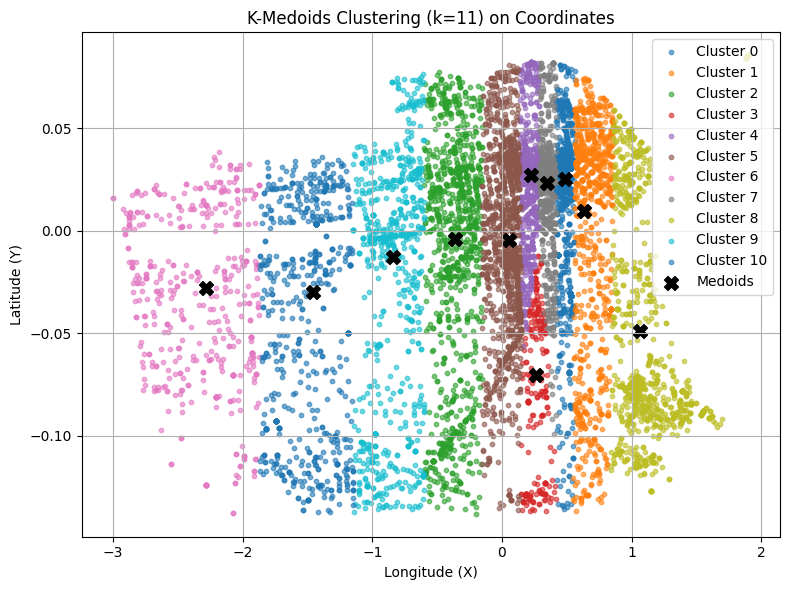

In [ ]:
# Add cluster labels to the DataFrame
sample_df['Cluster'] = kmedoids.labels_

plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    cluster_points = sample_df[sample_df['Cluster'] == cluster]
    plt.scatter(cluster_points['X'], cluster_points['Y'], s=10, label=f'Cluster {cluster}', alpha=0.6)

# Plot medoids
medoid_coords = kmedoids.cluster_centers_
plt.scatter(medoid_coords[:, 0], medoid_coords[:, 1], c='black', marker='X', s=100, label='Medoids')

plt.title(f'K-Medoids Clustering (k={best_k}) on Coordinates')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Set target (cluster labels from KMedoids)
y = sample_df['Cluster']

# Use all features as input (including X, Y)
X = sample_df.drop(columns=['Cluster'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       234
           1       0.99      1.00      0.99       273
           2       1.00      1.00      1.00       218
           3       0.91      0.98      0.94        51
           4       0.98      0.98      0.98       185
           5       1.00      1.00      1.00       302
           6       0.99      1.00      0.99        89
           7       1.00      0.98      0.99       196
           8       0.99      0.99      0.99       193
           9       0.99      0.99      0.99       137
          10       1.00      0.98      0.99       122

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



# *Test the relation between number of trees and training accuaracy*
Increasing the number of trees in a Random Forest model generally improves accuracy by reducing overfitting, but beyond a certain point, additional trees offer diminishing returns. The optimal number of trees is found through experimentation, balancing accuracy and computational efficiency.



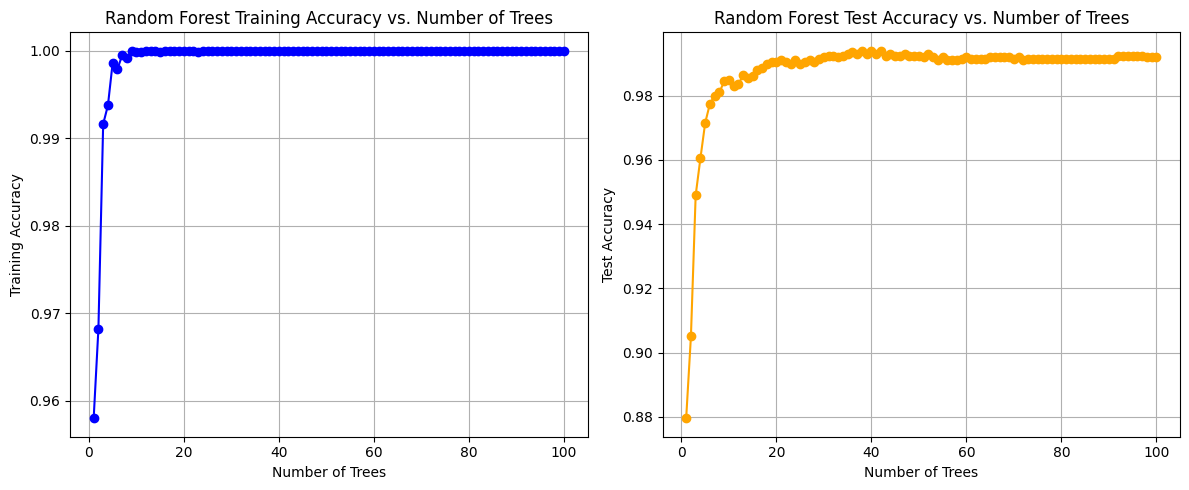

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List to store accuracy over different number of trees (estimators)
train_accuracies = []
test_accuracies = []

# Loop to train with different number of estimators (trees)
for n_estimators in range(1, 101):  # Example: number of trees from 1 to 100
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)

    # Get training and test accuracy for the current model
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Store accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plotting accuracy over the number of trees (estimators)
plt.figure(figsize=(12, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), train_accuracies, marker='o', color='blue')
plt.title('Random Forest Training Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Training Accuracy')
plt.grid(True)

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), test_accuracies, marker='o', color='orange')
plt.title('Random Forest Test Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


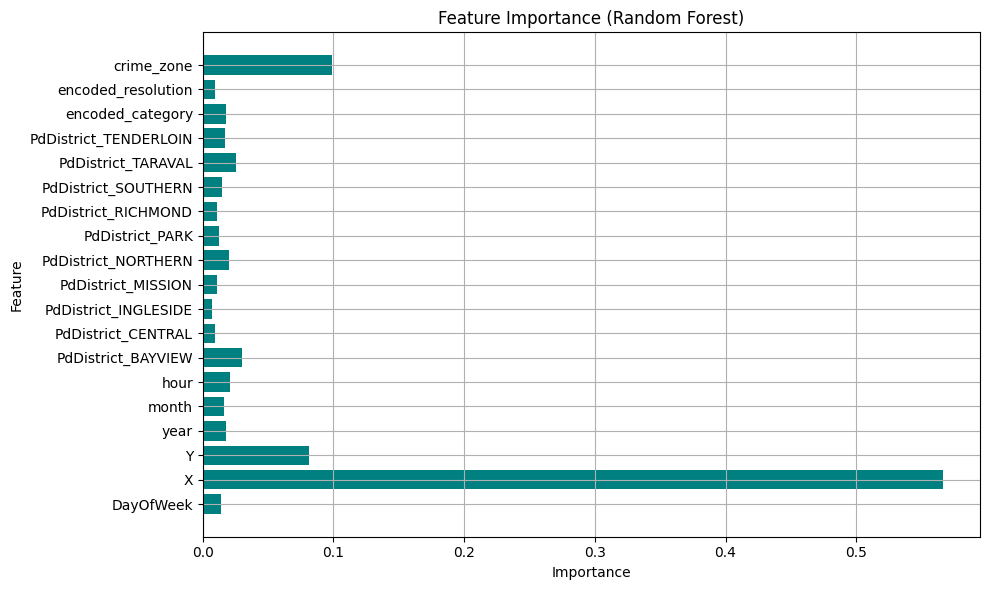

In [ ]:
# Plot feature importances
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True)
plt.show()


# **Evaluation metric**
**kmedoids**
1. Inertia
2. Davies-Bouldin Score
3. Calinski-Harabasz Score

**Random forest**
1. accuracy
2. confusion matrix
3. classification report
4. cross validation


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Use a sample for clustering and evaluation to avoid memory issues
# X_geo: coordinates (sample), sample_df: sampled DataFrame

kmedoids = KMedoids(n_clusters=10, random_state=42)
labels = kmedoids.fit_predict(X_geo)


db_score = davies_bouldin_score(X_geo, labels)
ch_score = calinski_harabasz_score(X_geo, labels)

print(f"Davies-Bouldin Index: {db_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

c:\Users\Begad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
c:\Users\Begad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(


Davies-Bouldin Index: 0.6435
Calinski-Harabasz Score: 39415.7313


In [ ]:
#Inertia is the sum of squared distances between each data point and its assigned cluster center
#Measures how compact the clusters are( Lower inertia means the clusters are tighter)
print(f"Inertia: {kmedoids.inertia_}") 

#measures the average similarity between clusters
#Lower scores indicate better clustering
db_index = davies_bouldin_score(X_geo, kmedoids.labels_)
print(f"Davies-Bouldin Index: {db_index:.4f}")

# measures the ratio of between-cluster dispersion and within-cluster dispersion.
# Higher scores indicate better-defined clusters (more separated and tighter groups)
ch_score = calinski_harabasz_score(X_geo, kmedoids.labels_)
print(f"Calinski-Harabasz Score: {ch_score:.4f}")



Inertia: 1022.8398376955938
Davies-Bouldin Index: 0.6435
Calinski-Harabasz Score: 39415.7313


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9920


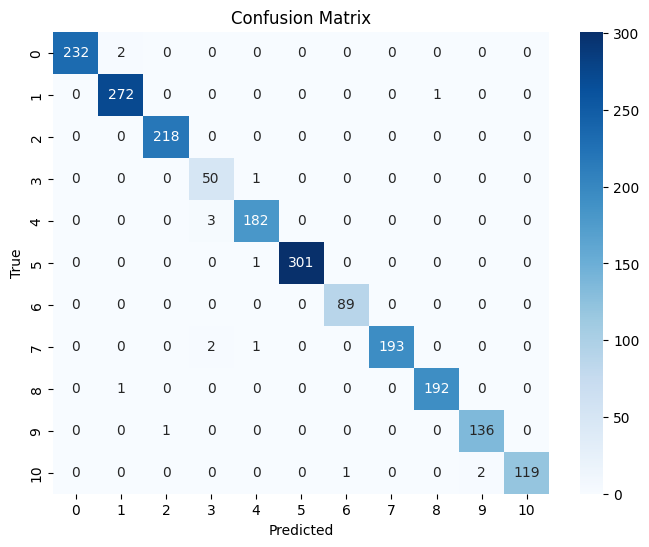

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(best_k), yticklabels=range(best_k))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Precision:** measures the accuracy of positive predictions made by the model
High precision means that when the model predicts a class  it’s very likely to be correct

**Recall:** measures how well the model identifies all actual positive cases
High recall means the model is good at identifying all the positive cases, but it might also produce more false positives

**F1-Score:** is the harmonic mean of precision and recall. It combines both metrics into a single score that considers both false positives and false negatives
 gives you a single metric that helps you understand the balance between precision and recall


In [ ]:
from sklearn.metrics import classification_report

#gives a detailed breakdown of the model’s performance for each class
# Generate and print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       234
           1       0.99      1.00      0.99       273
           2       1.00      1.00      1.00       218
           3       0.91      0.98      0.94        51
           4       0.98      0.98      0.98       185
           5       1.00      1.00      1.00       302
           6       0.99      1.00      0.99        89
           7       1.00      0.98      0.99       196
           8       0.99      0.99      0.99       193
           9       0.99      0.99      0.99       137
          10       1.00      0.98      0.99       122

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
#Micro-averaging gives insight into how well the model is performing across all classes without being biased by class imbalance
from sklearn.metrics import precision_score, recall_score, f1_score
#provides a general view of the model's performance when classes have significantly different numbers of instances
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

print(f"Micro-Averaged Precision: {precision_micro:.4f}")
print(f"Micro-Averaged Recall: {recall_micro:.4f}")
print(f"Micro-Averaged F1-Score: {f1_micro:.4f}")


Micro-Averaged Precision: 0.9920
Micro-Averaged Recall: 0.9920
Micro-Averaged F1-Score: 0.9920


In [ ]:
from sklearn.model_selection import cross_val_score
# helps detect overfitting, and is a crucial step for model selection If the model performs well on all folds, then it's likely a good fit for the dataset
# Perform cross-validation (5-fold in this case)
cv_scores = cross_val_score(clf, X, y, cv=5)  # Adjust X and y for your dataset
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.9905 0.9915 0.995  0.995  0.9915]
Mean CV score: 0.9927
